**OpenViSUS: read from a remote dataset**

To execute this notebook:

python3 -m pip install  numpy matplotlib ipyvolume OpenVisus



In [1]:
import os,sys
import matplotlib.pyplot as plt
import numpy

def ShowData(data):
    fig = plt.figure(figsize = (70,20))
    ax = fig.add_subplot(1,1,1)
    ax.imshow(data, origin='lower')
    plt.show()

In [2]:
sys.path.append(r"D:\projects\OpenVisus\build\RelWithDebInfo")
from OpenVisus import *
db=PyDataset("http://atlantis.sci.utah.edu/mod_visus?dataset=2kbit1")
print(db.getDatasetBody().toString())

PythonEngine is working fine
<dataset url="http://atlantis.sci.utah.edu/mod_visus?dataset=2kbit1" typename="IdxDataset">
	<idxfile>
		<version value="2" />
		<bitmask value="V210210210210210210210210210210210" />
		<box value="0 2048 0 2048 0 2048" />
		<bitsperblock value="16" />
		<blocksperfile value="610" />
		<block_interleaving value="0" />
		<filename_template value="/usr/sci/visus1/data_old/nvisusio/3d/2kbit1/data/rec000_0000_%010d.bin" />
		<time_template value="" />
		<field name="DATA" description="" index="" default_compression="zip" default_layout="0" default_value="0" filter="" dtype="uint8" />
		<timestep when="0" />
	</idxfile>
</dataset>


shape (128, 256, 256) dtype uint8


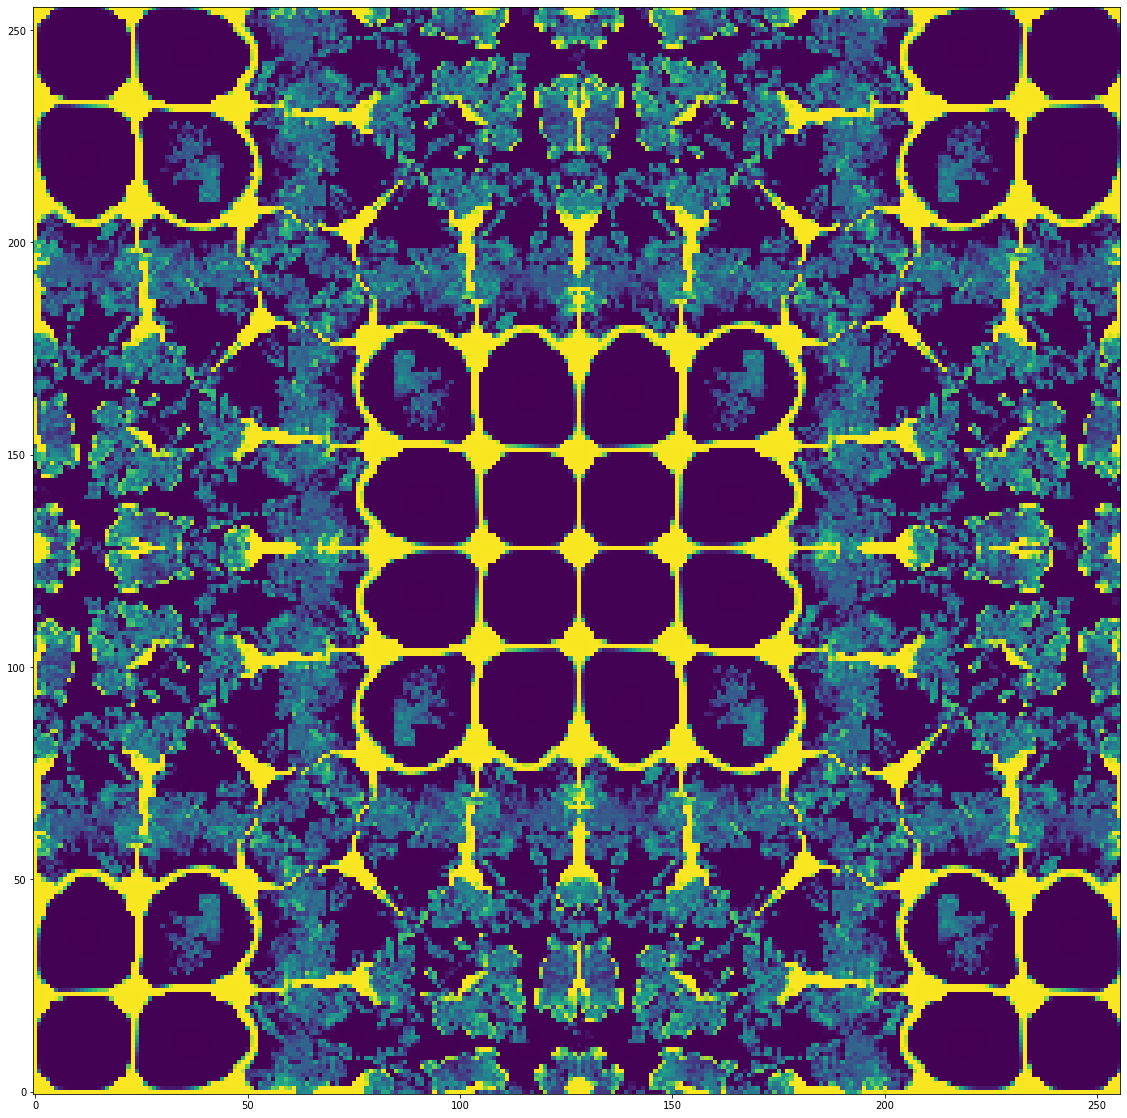

In [3]:
max_resolution=24
logic_box=db.getLogicBox(x=[0,2048],y=[0,2048],z=[1024,2048])
data=next(db.read(logic_box=logic_box,max_resolution=max_resolution))
print("shape",data.shape,"dtype",data.dtype)

# show first slice
ShowData(data[0,:,:]) 

**Test 2D plot**

Making a 3D query for volume rendering

In [4]:
data=next(db.read(logic_box=logic_box, max_resolution=max_resolution))
print("shape",data.shape,"dtype",data.dtype)

shape (128, 256, 256) dtype uint8


**Test volume rendering with iPyVolume**

In [12]:
import ipyvolume
ipyvolume.quickvolshow(data, level=[0.25, 0.75], opacity=0.03, level_width=0.1,  data_min=0,  data_max=255)
    